### Задание

В домашнем задании нужно решить задачу классификации точек наиболее эффективно. Для этого в работе необходимо применить различные методы по отбору признаков. Отбор признаков предпочтительнее осуществлять основываясь на математическом аппарате, поэтому данные для этого задания будут сгенерированы, чтобы избежать признаков с физическим смыслом.
Этапы работы:

1. Сгенерируйте данные с помощью кода:

    **from sklearn.datasets import make_classification
    x_data_generated, y_data_generated = make_classification(scale=1)**


2. Постройте модель логистической регрессии и оцените среднюю точность. Для этого используйте следующий код:

    **cross_val_score(LogisticRegression(), x, y, scoring=‘accuracy’).mean()**


3. Используйте статистические методы для отбора признаков:
    
    a) Выберите признаки на основе матрицы корреляции.
    
    b) Отсеките низковариативные признаки (VarianceThreshold).
    
    c) Повторите п. 2 на отобранных признаках в п. 3a, п. 3b.


4. Осуществите отбор признаков на основе дисперсионного анализа:
    
    a) Выберите 5 лучших признаков с помощью скоринговой функции для классификации f_classif (SelectKBest(f_classif, k=5)).
    
    b) Повторите п. 2 на отобранных признаках.


5. Отбор с использованием моделей:
    
    a) Реализуйте отбор признаков с помощью логистической регрессии. Отобранные признаки подайте далее на вход в саму логистическую регрессию (SelectFromModel). Используйте L1 регуляризацию.
    
    b) Реализуйте отбор признаков с помощью модели RandomForest и встроенного атрибута feature_impotance.
    
    c) Повторите п. 2 на отобранных признаках в п. 5a, п. 5b.
    
    Перебор признаков:
   
    a) SequentialFeatureSelector.
    
    b) Повторите п. 2 на отобранных признаках.


6. Сформулируйте выводы по проделанной работе:
    
    a) Сделайте таблицу вида |способ выбора признаков|количество признаков|средняя точность модели|.


**Для получения зачета по этому домашнему заданию минимально должны быть:**

- сгенерированы данные;
- использовано хотя бы три метода для отбора признаков;
- выведена средняя точность модели на каждом множестве отобранных признаков.

In [308]:
import numpy as np
import pandas as pd # Для работы с данными
import scipy.stats # При работе со статистикой
import seaborn as sns
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов
%matplotlib inline

from sklearn import datasets
from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import NeighborhoodComponentsAnalysis

from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesClassifier
import warnings
warnings.filterwarnings('ignore')

**1. Сгенерируйте данные с помощью кода:**

from sklearn.datasets import make_classification x_data_generated, y_data_generated = make_classification(scale=1)

**2. Постройте модель логистической регрессии и оцените среднюю точность. Для этого используйте следующий код:**

cross_val_score(LogisticRegression(), x, y, scoring=‘accuracy’).mean()

In [167]:
from sklearn.datasets import make_classification 

x_data_generated, y_data_generated = make_classification(scale=1, random_state=5)

In [307]:
print('Среднее качество модели по стандартным параметрам:', round(cross_val_score(LogisticRegression(), x_data_generated, y_data_generated, scoring='accuracy').mean(), 2)*100, '%')

Среднее качество модели по стандартным параметрам: 91.0 %


In [169]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-3.077590,-1.325881,0.177504,0.825433,-0.057060,-1.389849,0.252086,-0.297926,-0.147016,-0.783757,-2.762051,1.490733,-0.715817,-1.495114,-0.349433,-1.754250,-0.431269,-2.274748,-0.966537,1.176426
1,0.398040,0.412668,0.716833,0.027574,-1.065964,0.100676,-0.465867,-0.747182,1.614461,-0.177998,-0.309915,0.800267,0.470696,-0.937050,1.679638,2.129191,-0.878677,-0.992212,-0.568691,-0.746078
2,-0.220585,-1.207885,1.087783,-2.032611,-0.517097,0.361862,0.751815,-1.561579,0.238517,-0.937642,-0.847779,1.093302,0.307678,1.778855,0.711993,-2.367390,-0.791864,0.512859,0.111206,0.283066
3,0.360596,-0.977224,0.493625,0.568685,-0.940096,2.457668,0.450007,2.044793,-0.970794,-1.095616,-0.292071,0.387184,1.483526,-1.493434,-0.731682,0.804579,-0.748567,1.053029,-0.263135,0.061059
4,0.214109,-1.487576,0.014282,1.031351,-0.293920,-0.926711,-0.354426,1.000832,-0.476350,0.477778,0.893988,2.725340,1.063768,-1.609162,-1.336822,0.250521,-0.286587,1.021076,1.347296,-1.147678


In [309]:
X = pd.DataFrame(x_data_generated)

Y = pd.DataFrame(y_data_generated)

full_stack = np.concatenate([X, Y], axis=1)
data = pd.DataFrame(full_stack)
data.rename({20: 'Target'}, axis=1, inplace=True)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,Target
0,-0.491683,0.633594,1.511870,-1.460587,-0.346583,0.139753,1.203731,0.207998,-0.542386,-1.555118,...,-0.470786,0.762535,1.006664,1.004036,0.337443,1.466185,1.091651,-0.878391,-0.265286,1.0
1,0.578285,-0.820626,-0.399288,-2.026832,-2.920703,0.327791,0.749512,0.390597,0.475551,1.110174,...,-0.048012,2.177865,0.713426,-0.395399,0.364452,-0.562896,-1.187709,-0.988389,-1.420904,1.0
2,-0.213067,-0.464986,1.054409,1.041451,-0.177598,1.324069,1.524519,-0.869392,0.025975,0.683987,...,-2.448248,-0.088586,0.281655,1.475265,-1.184532,-0.400144,-0.027033,1.330968,0.664536,1.0
3,-0.844739,0.263558,0.869866,1.217011,1.591296,-0.246621,1.274724,-0.621333,-0.730382,-1.198907,...,0.448706,0.646052,1.650557,0.183608,0.025271,1.425767,-2.522119,0.951838,1.804741,1.0
4,0.226389,0.867632,-0.171974,2.169762,-0.929563,0.578196,0.459246,0.902480,-0.345037,-1.084814,...,0.207067,-1.166499,-0.952784,0.799130,1.316694,0.463670,-1.195624,0.032700,0.521784,0.0


#### 3. Используйте статистические методы для отбора признаков:

a) Выберите признаки на основе матрицы корреляции.

b) Отсеките низковариативные признаки (VarianceThreshold).

c) Повторите п. 2 на отобранных признаках в п. 3a, п. 3b.

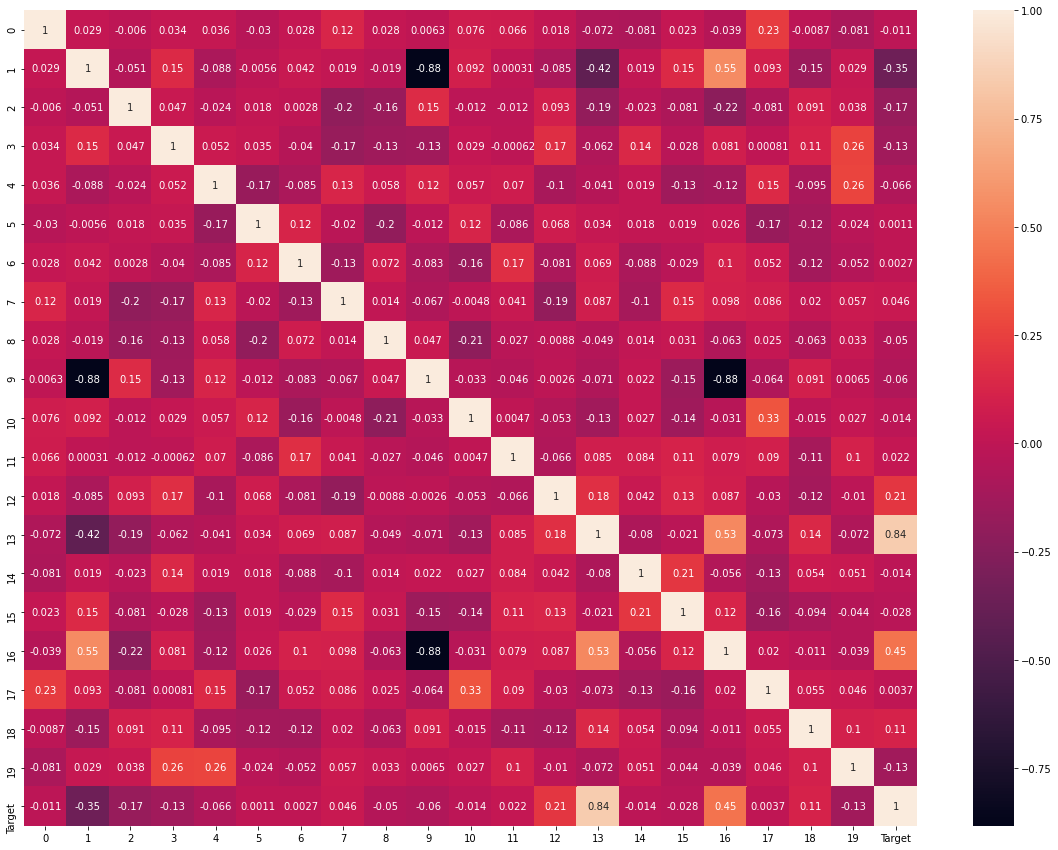

In [171]:
corr = data.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr, annot=True)
plt.show()

In [261]:
cols = list(data)
cols[:-1]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [296]:
model = ExtraTreesClassifier()
model.fit(X, Y) 
for i in range(len(cols)-1):
    print(f"{cols[i]}\t- {model.feature_importances_[i]:.4f}")

0	- 0.0179
1	- 0.0888
2	- 0.0225
3	- 0.0256
4	- 0.0218
5	- 0.0225
6	- 0.0221
7	- 0.0215
8	- 0.0324
9	- 0.0442
10	- 0.0203
11	- 0.0202
12	- 0.0316
13	- 0.3715
14	- 0.0235
15	- 0.0216
16	- 0.1217
17	- 0.0220
18	- 0.0225
19	- 0.0259


Если матрица корреляции указывает на 16, 12 и 13 параметр, то extra trees показывают наиболее значимыми параметры 16 и 13. 

In [297]:
from sklearn.feature_selection import VarianceThreshold
    
selector = VarianceThreshold()
X_vt = selector.fit_transform(X)


In [300]:
X_corr_max = X[[12, 13, 16]]
X_corr_max.head()

,12,13,16
0,0.762535,1.006664,1.466185
1,2.177865,0.713426,-0.562896
2,-0.088586,0.281655,-0.400144
3,0.646052,1.650557,1.425767
4,-1.166499,-0.952784,0.463670


In [302]:
print('Среднее качество модели по параметрам на основе матрицы корреляций:', cross_val_score(LogisticRegression(), X_corr_max, y_data_generated, scoring='accuracy').mean()*100, '%')

Среднее качество модели по параметрам на основе матрицы корреляций: 94.0 %


In [310]:
print('Среднее качество модели по параметрам на основе Variance Threshold:', round(cross_val_score(LogisticRegression(), X_vt, y_data_generated, scoring='accuracy').mean(), 2)*100, '%')

Среднее качество модели по параметрам на основе Variance Threshold: 91.0 %


#### 4. Осуществите отбор признаков на основе дисперсионного анализа:

a) Выберите 5 лучших признаков с помощью скоринговой функции для классификации f_classif (SelectKBest(f_classif, k=5)).

b) Повторите п. 2 на отобранных признаках.



In [295]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(f_classif, k=5)
selector.fit(X, Y)
scores = -np.log10(selector.pvalues_)
scores /= scores.max()

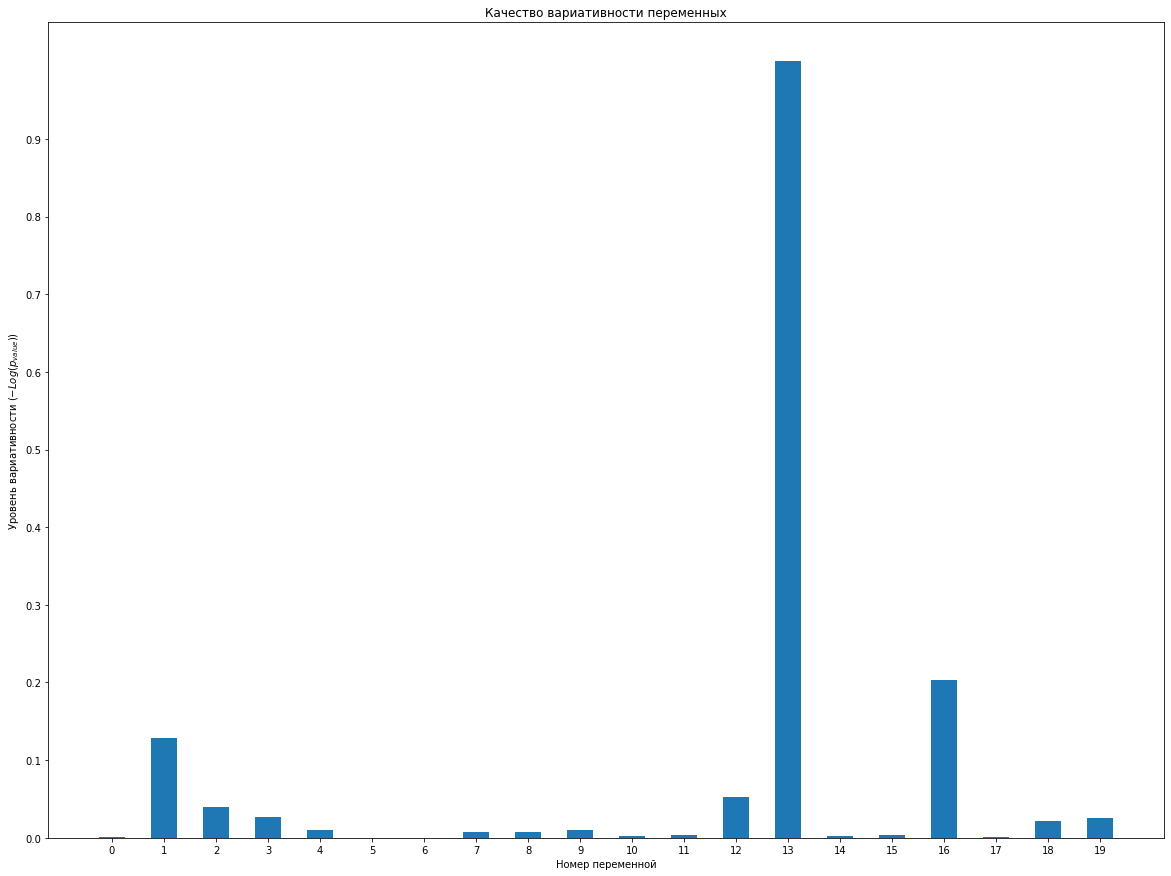

In [179]:
import matplotlib.pyplot as plt

X_indices = np.arange(X.shape[-1])
plt.figure(figsize=(20,15))
plt.clf()
plt.bar(X_indices, scores, width=0.5)
plt.title("Качество вариативности переменных")
plt.xlabel("Номер переменной")
plt.ylabel(r"Уровень вариативности ($-Log(p_{value})$)")
plt.xticks(range(0,20, 1))
plt.yticks(np.arange(0,1,0.1))
plt.show()

А здесь результат уже другой: в лидерах 13, 16, 1 и только потом 12 параметр

#### 5. Отбор с использованием моделей:
    
    a) Реализуйте отбор признаков с помощью логистической регрессии. Отобранные признаки подайте далее на вход в саму логистическую регрессию (SelectFromModel). Используйте L1 регуляризацию.
    
    b) Реализуйте отбор признаков с помощью модели RandomForest и встроенного атрибута feature_impotance.
    
    c) Повторите п. 2 на отобранных признаках в п. 5a, п. 5b.

In [180]:
from sklearn.feature_selection import SelectFromModel

In [290]:

selector = SelectFromModel(estimator=LogisticRegression(penalty='l1', solver='liblinear')).fit(X, Y);
selector.estimator_.coef_


array([[ 0.02248228,  0.        ,  0.        , -0.18835852,  0.        ,
         0.        ,  0.        ,  0.        , -0.28592543,  0.        ,
         0.07721145, -0.34542998,  0.1137139 ,  4.64163255,  0.19194694,
         0.        ,  0.62830552,  0.27121023,  0.        , -0.203865  ]])

In [293]:
# Натянем на модель в качестве X сразу модифицированный датасет с отобранными с помощью SelectFromModel 
# наиболее важными признаками

print('Среднее качество модели по параметрам от SelectFromModel:',cross_val_score(LogisticRegression(), SelectFromModel(estimator=LogisticRegression(penalty='l1', solver='liblinear')).fit(X, Y).transform(X), Y, scoring='accuracy').mean()*100, '%')

Среднее качество модели по параметрам от SelectFromModel: 94.0 %


In [294]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state=0)
forest.fit(X, Y)

RandomForestClassifier(random_state=0)

In [221]:
importances = forest.feature_importances_

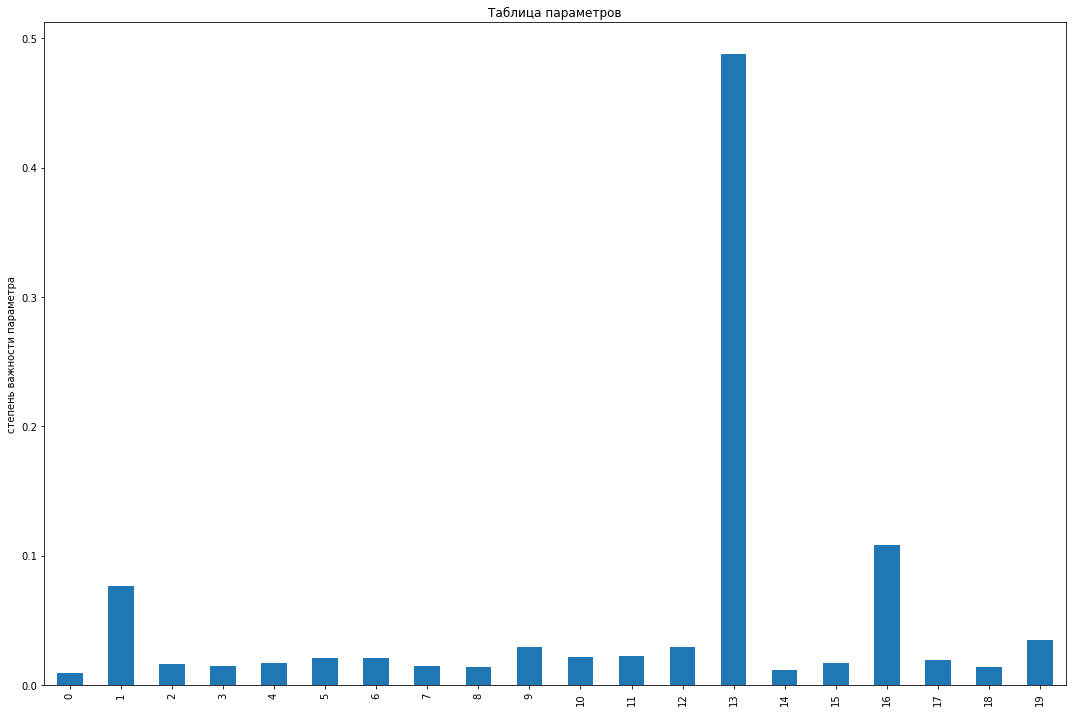

In [241]:
forest_importances = pd.Series(importances, index=cols[:-1])
plt.rcParams["figure.figsize"] = (15,10)
fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Таблица параметров")
ax.set_ylabel("степень важности параметра")
fig.tight_layout()


In [244]:
X_rf = X[[1, 13, 16, 17]]

In [288]:
print('Среднее качество модели по параметрам от Random Forest:', round(cross_val_score(LogisticRegression(), X_rf, Y, scoring='accuracy').mean(), 2)*100, '%')

Среднее качество модели по параметрам от Random Forest: 94.0 %


In [289]:
from sklearn.feature_selection import SequentialFeatureSelector
ridge = RidgeCV(alphas=np.logspace(-6, 6, num=5)).fit(X, Y)


X_forward = SequentialFeatureSelector(ridge, n_features_to_select=2, direction="forward").fit(X, Y).transform(X)
print('Среднее качество модели по параметрам от SequentialFeatureSelector (Forward):', cross_val_score(LogisticRegression(), X_forward, Y, scoring='accuracy').mean()*100, '%')


Среднее качество модели по параметрам от SequentialFeatureSelector (Forward): 96.0 %
